In [19]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load data and prepare data
cancer_df = pd.read_csv('haberman.csv')

print(cancer_df.shape)
print("*"*50)
print(cancer_df.columns)
print("*"*50)
print(cancer_df.head())
print("*"*50)
print(cancer_df.tail())
print("*"*50)
print(cancer_df.info())
print("*"*50)
print(cancer_df['status'].unique())
cancer_df['status'] = cancer_df['status'].map({1:'Yes', 2:'No'})
cancer_df['status'] = cancer_df['status'].astype('category')
print("*"*50)
print(cancer_df.head())
print("*"*50)
print(cancer_df.info())

(306, 4)
**************************************************
Index(['age', 'year', 'nodes', 'status'], dtype='object')
**************************************************
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
**************************************************
     age  year  nodes  status
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
**************************************************
[1 2]
**************************************************
   age  ye

Observations:
1. In the data we have 306 rows and 4 columns. There is 0 non-null values in our data or we can say there is no data impurity in given data set.
2. We can treat status as our class label because it states whether user is survived 5 years from operation or not.
3. We convert status int64 to string yes or no where 1=Yes and 2=No

In [21]:
# High level Analysis

print(cancer_df.describe())
print("*"*50)

# Mean and standard deviation (Std-dev)
print("Mean\n")
print(np.mean(cancer_df['age']))
print("*"*50)
print(np.mean(cancer_df['year']))
print("*"*50)
print(np.mean(cancer_df['nodes']))
print("*"*50)
print("\nStd-dev\n")
print(np.std(cancer_df['age']))
print("*"*50)
print(np.std(cancer_df['year']))
print("*"*50)
print(np.std(cancer_df['nodes']))

print("\nMedian\n")
print(np.median(cancer_df['age']))
print("*"*50)
print(np.median(cancer_df['year']))
print("*"*50)
print(np.median(cancer_df['nodes']))
print("*"*50)


print("\nQuantiles\n")
print(np.percentile(cancer_df['age'], np.arange(0,100,25)))
print("*"*50)
print(np.percentile(cancer_df['year'], np.arange(0,100,25)))
print("*"*50)
print(np.percentile(cancer_df['nodes'], np.arange(0,100,25)))
print("*"*50)

print("\nTarget Value Distribution\n")
print(cancer_df.iloc[:,-1].value_counts())
print("*"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize=True))

              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000
**************************************************
Mean

52.45751633986928
**************************************************
62.85294117647059
**************************************************
4.026143790849673
**************************************************

Std-dev

10.78578520363183
**************************************************
3.244090833563246
**************************************************
7.177896092811152

Median

52.0
**************************************************
63.0
**************************************************
1.0
**************************************************

Quantiles

[30.

Observations:

1. Min age of patient is 30 years and maximum age is 83 years.
2. Max positive nodes are 52, 25% people have 0 positive nodes and 75% patients have less than 5 positive nodes.
3. Out of 306 data set approx. 73% data is yes so we can say data is imbalance.

/Users/mayankgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mayankgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


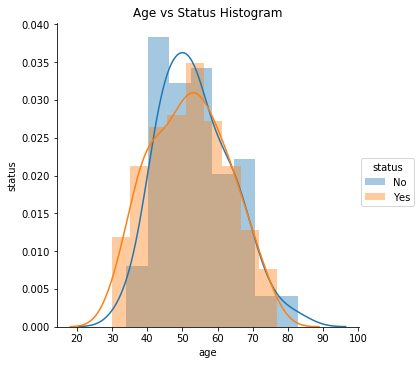

/Users/mayankgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mayankgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


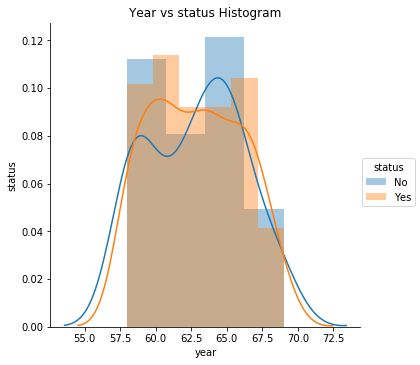

/Users/mayankgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mayankgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


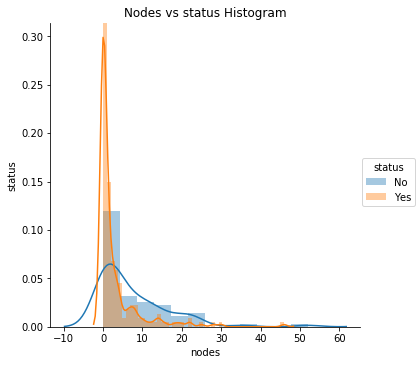

In [22]:
# Uni variate analysis

# Histograms
sns.FacetGrid(cancer_df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();

plt.title('Age vs Status Histogram');
plt.xlabel('age');
plt.ylabel('status');
plt.show();

sns.FacetGrid(cancer_df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();

plt.title('Year vs status Histogram');
plt.xlabel('year');
plt.ylabel('status');
plt.show();

sns.FacetGrid(cancer_df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();

plt.title('Nodes vs status Histogram');
plt.xlabel('nodes');
plt.ylabel('status');
plt.show();


**************************************************
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
**************************************************
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
**************************************************
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


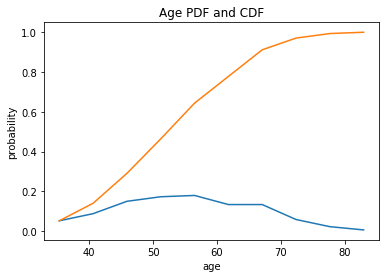

**************************************************
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
**************************************************
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
**************************************************
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


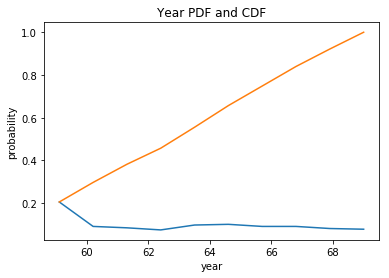

**************************************************
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
**************************************************
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
**************************************************
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


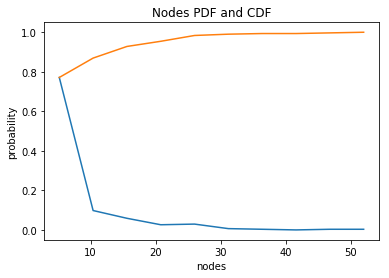

In [23]:
# PDF and CDF

# By age
counts, bin_edges = np.histogram(cancer_df['age'], bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

print("*"*50)
print(pdf)
print("*"*50)
print(bin_edges)
print("*"*50)
print(cdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('Age PDF and CDF');
plt.xlabel('age');
plt.ylabel('probability');
plt.show()

# By year
counts, bin_edges = np.histogram(cancer_df['year'], bins=10, density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print("*"*50)
print(pdf)
print("*"*50)
print(bin_edges)
print("*"*50)
print(cdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('Year PDF and CDF');
plt.xlabel('year');
plt.ylabel('probability');
plt.show()

# By positive nodes
counts, bin_edges = np.histogram(cancer_df['nodes'], bins=10, density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print("*"*50)
print(pdf)
print("*"*50)
print(bin_edges)
print("*"*50)
print(cdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('Nodes PDF and CDF');
plt.xlabel('nodes');
plt.ylabel('probability');
plt.show()

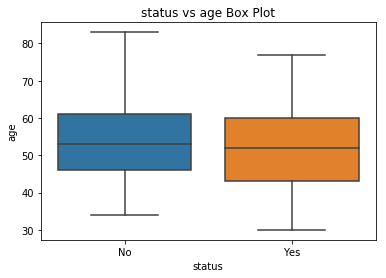

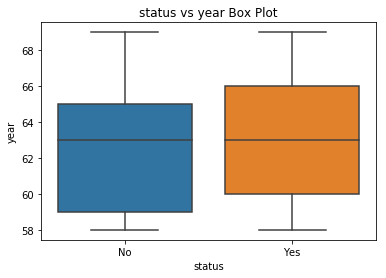

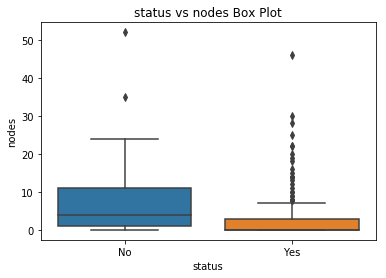

In [24]:
# Box plot

sns.boxplot(x='status',y='age', data=cancer_df)
plt.title('status vs age Box Plot')
plt.show()

sns.boxplot(x='status',y='year', data=cancer_df)
plt.title('status vs year Box Plot')
plt.show()

sns.boxplot(x='status',y='nodes', data=cancer_df)
plt.title('status vs nodes Box Plot')
plt.show()

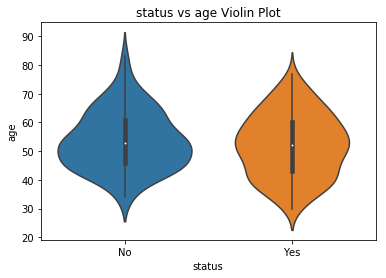

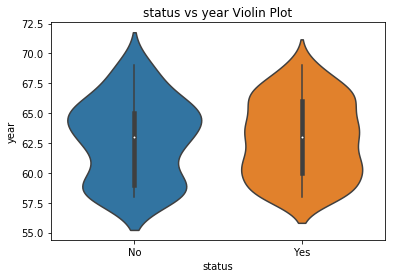

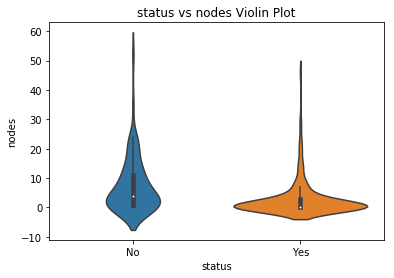

In [25]:
# violin plot

sns.violinplot(x="status", y="age", data=cancer_df, size=8)
plt.title('status vs age Violin Plot')
plt.show()

sns.violinplot(x="status", y="year", data=cancer_df, size=8)
plt.title('status vs year Violin Plot')
plt.show()

sns.violinplot(x="status", y="nodes", data=cancer_df, size=8)
plt.title('status vs nodes Violin Plot')
plt.show()

Observations:

1. No. of positive nodes from 0-5 are highly dense (find out using histogram)
2. Approx. 80% of patients less than 5 positive nodes (find out using cdf)
3. The patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest. (find out using box plot and violin plot)

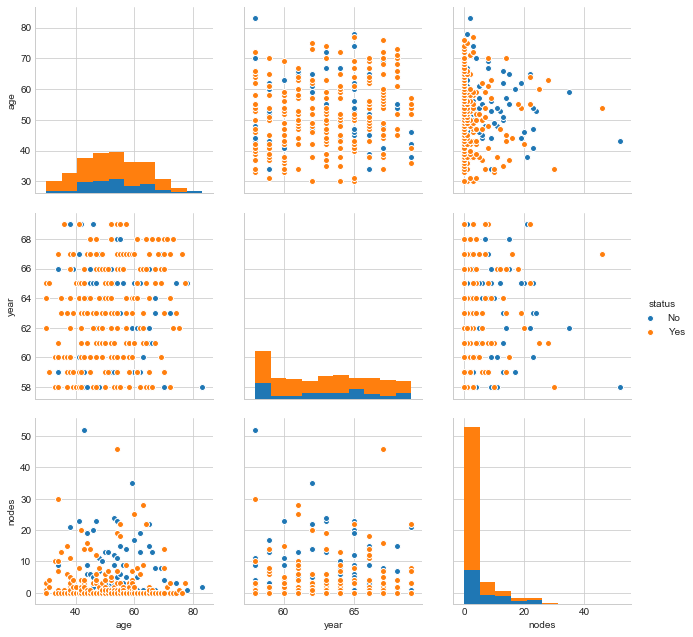

In [30]:
# Multi variate analysis
# Pair plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer_df, hue="status", size=3);

plt.show()

Observations:

1. Year of treatment and positive nodes has better separation than others.

**Conclusion:**

1. We are treating status as our class label because it states whether user is survived 5 years from operation or not.
2. Min age of patient is 30 years and maximum age is 83 years.
3. Max positive nodes are 52, 25% people have 0 positive nodes and 75% patients have less than 5 positive nodes.
4. Approx. 80% of patients less than 5 positive nodes.
5. The patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest.